In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import glob
import cv2
import albumentations as A
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator  
from tensorflow.keras.layers import Dense, Flatten 
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint  
from tensorflow.keras import Model  
from sklearn.metrics import classification_report, confusion_matrix


In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


train_datagen = ImageDataGenerator(rescale=1.0/255.0)
train_generator = train_datagen.flow_from_directory(
    'D:\\mini project 1\\train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 10224 images belonging to 2 classes.


In [7]:
def load_data():
    train_altered = glob.glob('D:\\mini project 1\\train\\altered/*.png')
    train_original = glob.glob('D:\\mini project 1\\train\\original/*.png')

    val_altered = glob.glob('D:\\mini project 1\\val\\altered/*.png')
    val_original = glob.glob('D:\\mini project 1\\val\\original/*.png')

    random.shuffle(train_altered)
    random.shuffle(train_original)

    print('number of train altered images = {}'.format(len(train_altered)))
    print('number of train original images = {}'.format(len(train_original)))

    print('------------------------------------')

    print('number of test altered images = {}'.format(len(val_altered)))
    print('number of test original images = {}'.format(len(val_original)))


load_data()

number of train altered images = 5112
number of train original images = 5112
------------------------------------
number of test altered images = 1000
number of test original images = 1000


Number of train altered images = 5112
Number of train original images = 5112


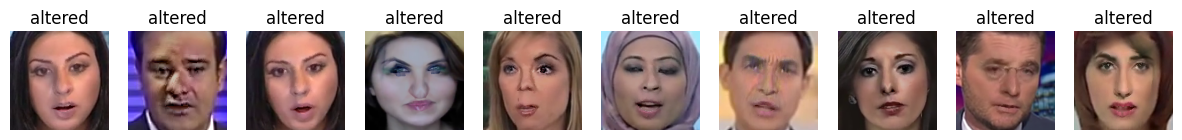

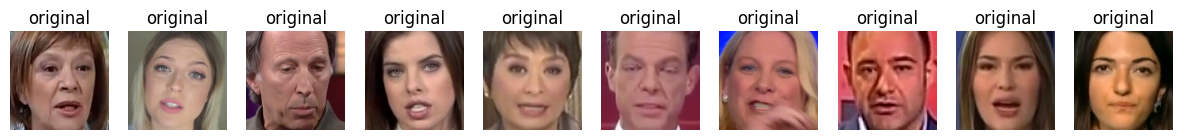

In [8]:
import glob 
import cv2
import matplotlib.pyplot as plt
import random

def plot_images(data, image_title, num_of_images, type_image='bgr'):
    plt.figure(figsize=(15, 10))
    for i in range(num_of_images):
        random_image = random.choice(data)
        if isinstance(data, list):  # If input is a list of file paths
            random_image = cv2.imread(random_image)

        if type_image.lower() == 'bgr':  # Convert BGR to RGB
            random_image = cv2.cvtColor(random_image, cv2.COLOR_BGR2RGB)

        plt.subplot(1, num_of_images, i + 1)
        plt.imshow(random_image)
        plt.axis('off')
        plt.title(image_title)

    plt.show()

train_altered = glob.glob('D:\\mini project 1\\train\\altered/*.png')
train_original = glob.glob('D:\\mini project 1\\train\\original/*.png')

print(f"Number of train altered images = {len(train_altered)}")
print(f"Number of train original images = {len(train_original)}")

if train_altered and train_original:  # Proceed only if images are found
    plot_images(train_altered, 'altered', 10)
    plot_images(train_original, 'original', 10)
else:
    print("No images found. Check your file paths.")



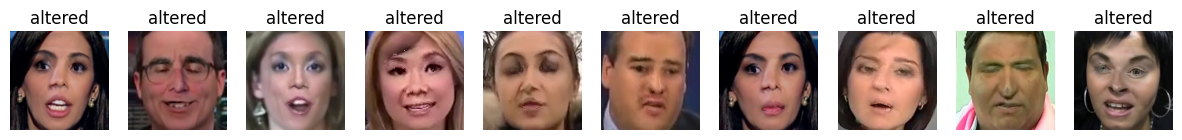

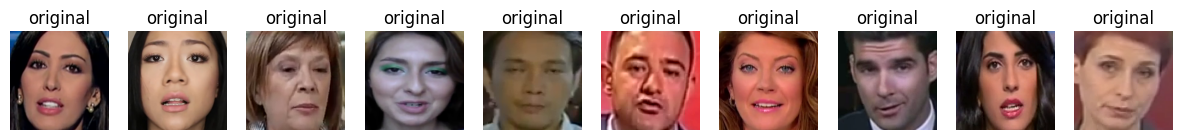

In [9]:
def plot_images (data ,image_title,num_of_images ,type_image = 'bgr'):

    plt.figure(figsize=(15,10))
    for i in range (num_of_images):
        random_image = random.choice(data)
        if type (data) == list:
            random_image = cv2.imread(random_image)

        if type_image.lower() == 'bgr':
            random_image =  cv2.cvtColor(random_image, cv2.COLOR_BGR2RGB)


        plt.subplot(1,num_of_images,i+1)
        plt.imshow(random_image)
        plt.axis('off')
        plt.title (image_title)

    plt.show()

plot_images (train_altered ,'altered',10)
plot_images (train_original ,'original',10)

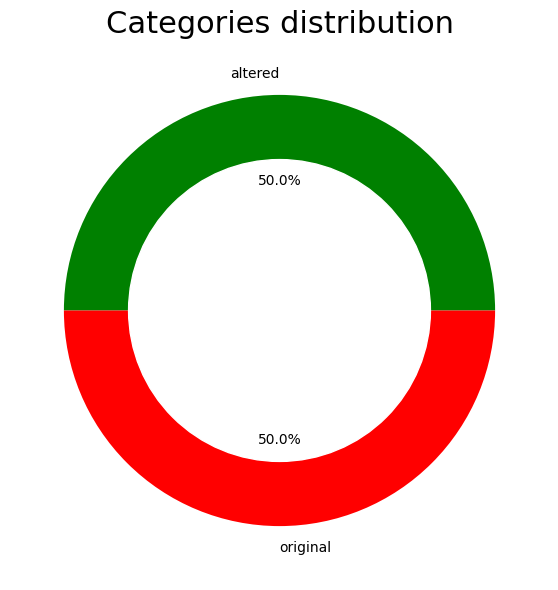

In [10]:
def plt_pie (data,labels,colors,title):
    plt.figure(figsize=(7,7))
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    plt.pie(data,labels = labels, colors = colors , autopct='%1.1f%%')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.title (title,fontsize = 22)
    plt.show()

data = [len (train_altered) , len (train_original) ]
labels = ['altered' , 'original' ]
colors = ['green','red']
plt_pie (data,labels,colors , 'Categories distribution')

In [11]:
def image_augmentation(data, target, p=0.5):
    images = []
    albumentation_list = [
        A.RandomBrightnessContrast(brightness_limit=0.5, contrast_limit=0.5, p=p),
        A.RGBShift(p=p),
        
        A.Rotate(limit=40, p=p),
        A.RandomSizedCrop(min_max_height=(200, 256), height=256, width=256, p=p)
    ]

    while len(images) < target:
        for image in data:
            img = cv2.resize(cv2.imread(image), (256, 256))
            operation = random.choice(albumentation_list)
            img = operation(image=img)['image']

            if img.shape[0] != 256:
                img = cv2.resize(img, (256, 256))

            images.append(img)

            if len(images) >= target:
                break
    return np.array(images)

In [12]:
def convert_links_to_images(data):
    images = []
    for image in data:
        img = cv2.resize(cv2.imread(image), (256, 256))
        images.append(img)
    return np.array(images)

In [13]:
pip install albumentations


Note: you may need to restart the kernel to use updated packages.


In [14]:
import albumentations as A

p = 0.7  
albumentation_list = [
    A.RandomBrightnessContrast(brightness_limit=0.5, contrast_limit=0.5, p=p),
    A.RGBShift(p=p),
    A.Rotate(limit=40, p=p),
    A.RandomCrop(height=200, width=200, p=p)
]


In [15]:
def image_augmentation(data, target, p=0.5):
    import random
    import numpy as np
    import cv2
    import albumentations as A

    images = []

    albumentation_list = [
        A.RandomBrightnessContrast(brightness_limit=0.5, contrast_limit=0.5, p=p),
        A.RGBShift(p=p),
        A.Rotate(limit=40, p=p),
        A.RandomCrop(height=200, width=200, p=p)
    ]

    while len(images) < target:
        for image in data:
            try:
                img = cv2.resize(cv2.imread(image), (256, 256))
                operation = random.choice(albumentation_list)
                img = operation(image=img)['image']

                if img.shape[0] != 256:
                    img = cv2.resize(img, (256, 256))

                images.append(img)

                if len(images) >= target:
                    break
            except Exception as e:
                print(f"Error processing {image}: {e}")

    return np.array(images)


In [16]:
import glob
train_altered = glob.glob('D:\\mini project 1\\train\\altered/*.png')
train_original = glob.glob('D:\\mini project 1\\train\\original/*.png')


In [17]:
import cv2

def convert_links_to_images(image_paths):
  
    images = [cv2.imread(image_path) for image_path in image_paths]
    return images


In [18]:
import glob
import cv2

def convert_links_to_images(image_paths):
    images = [cv2.imread(image_path) for image_path in image_paths]
    return images


train_altered = glob.glob('D:\\mini project 1\\train\\altered/*.png')
train_original = glob.glob('D:\\mini project 1\\train\\original/*.png')


train_altered = image_augmentation(train_altered, 3500, p=0.7)
train_original = image_augmentation(train_original, 3500, p=0.7)


val_altered = glob.glob('D:\\mini project 1\\val\\altered/*.png')
val_original = glob.glob('D:\\mini project 1\\val\\original/*.png')


val_altered = convert_links_to_images(val_altered)
val_original = convert_links_to_images(val_original)


In [19]:
import matplotlib.pyplot as plt
import random
import cv2

def plot_images(data, image_title, num_of_images, type_image='bgr'):
    plt.figure(figsize=(15,10))
    for i in range(num_of_images):
        random_image = random.choice(data)
        if isinstance(data, list):
            random_image = cv2.imread(random_image)

        if type_image.lower() == 'bgr':
            random_image = cv2.cvtColor(random_image, cv2.COLOR_BGR2RGB)

        plt.subplot(1, num_of_images, i+1)
        plt.imshow(random_image)
        plt.axis('off')
        plt.title(image_title)

    plt.show()


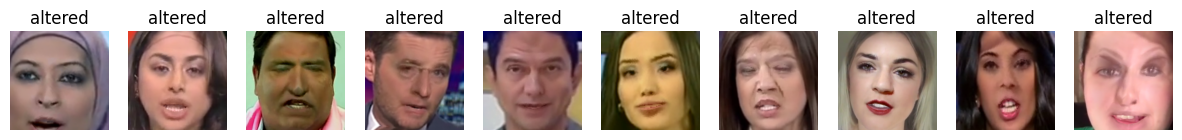

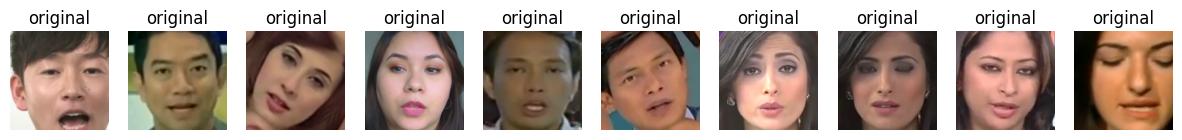

In [20]:
plot_images (train_altered  ,'altered',10)
plot_images (train_original  ,'original',10)

In [21]:
import numpy as np

def plot_images(data, image_title, num_of_images, type_image='bgr'):
    plt.figure(figsize=(15, 10))
    for i in range(num_of_images):
        random_image = random.choice(data)
        
        
        if isinstance(random_image, np.ndarray):
            img_to_display = random_image
        else:
            
            img_to_display = cv2.imread(random_image)
            if img_to_display is None:
                print(f"Error loading image: {random_image}")
                continue

    
        if type_image.lower() == 'bgr':
            img_to_display = cv2.cvtColor(img_to_display, cv2.COLOR_BGR2RGB)

        plt.subplot(1, num_of_images, i + 1)
        plt.imshow(img_to_display)
        plt.axis('off')
        plt.title(image_title)
    
    plt.show()


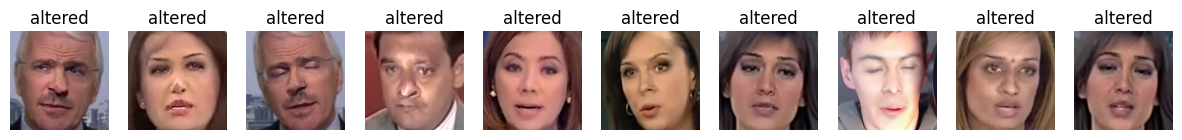

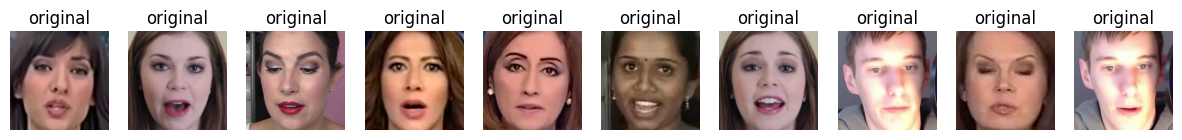

In [22]:
plot_images(val_altered, 'altered', 10)
plot_images(val_original, 'original', 10)


In [23]:
import numpy as np
import cv2

def resize_images(images, target_size=(224, 224)):
    return [cv2.resize(img, target_size) for img in images]

train_altered_resized = resize_images(train_altered)
train_original_resized = resize_images(train_original)
val_altered_resized = resize_images(val_altered)
val_original_resized = resize_images(val_original)

X_train = np.concatenate([train_altered_resized, train_original_resized], axis=0)
y_train = np.concatenate([np.zeros(len(train_altered)), np.ones(len(train_original))], axis=0)

X_test = np.concatenate([val_altered_resized, val_original_resized], axis=0)
y_test = np.concatenate([np.zeros(len(val_altered)), np.ones(len(val_original))], axis=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(7000, 224, 224, 3)
(7000,)
(2000, 224, 224, 3)
(2000,)


In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [25]:
train_datagen = ImageDataGenerator( rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255,)

train_generator = train_datagen.flow(X_train, y_train,batch_size=16,shuffle=True)
test_generator = test_datagen.flow(X_test, y_test,batch_size=16,shuffle=False)

X_train,y_train,X_test = None, None,None
del X_train,y_train,X_test

In [26]:
from tensorflow.keras.applications.inception_v3 import InceptionV3


In [27]:
inception = InceptionV3(input_shape=(256, 256, 3),
                        include_top=False,
                        weights='imagenet')
inception.trainable = False


In [28]:
pip install tensorflow


In [7]:
from tensorflow.keras.applications.inception_v3 import InceptionV3


In [8]:

from tensorflow.keras.applications.inception_v3 import InceptionV3


inception = InceptionV3(input_shape=(256, 256, 3),
                        include_top=False,
                        weights='imagenet')

inception.trainable = False


In [6]:
import os
import glob
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def load_images_from_directory(directory, target_size=(256, 256)):
    images = []
    for filename in os.listdir(directory):
        img_path = os.path.join(directory, filename)
        if os.path.isfile(img_path):
            img = load_img(img_path, target_size=target_size)
            img_array = img_to_array(img)
            images.append(img_array)
    return np.array(images)

train_altered = glob.glob('D:\\mini project 1\\train\\altered/*.png')
train_original = glob.glob('D:\\mini project 1\\train\\original/*.png')

val_altered = glob.glob('D:\\mini project 1\\val\\altered/*.png')
val_original = glob.glob('D:\\mini project 1\\val\\original/*.png')


X_train = np.concatenate([train_altered, train_original], axis=0)
y_train = np.concatenate([np.zeros(len(train_altered)), np.ones(len(train_original))], axis=0)

X_test = np.concatenate([val_altered, val_original], axis=0)
y_test = np.concatenate([np.zeros(len(val_altered)), np.ones(len(val_original))], axis=0)


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3


train_dir = 'D:\\mini project 1\\train'
val_dir = 'D:\\mini project 1\\val'


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=16,
    class_mode='binary', 
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(256, 256),
    batch_size=16,
    class_mode='binary',
    shuffle=False
)

inception = tf.keras.applications.InceptionV3(input_shape=(256, 256, 3),
                                               include_top=False,
                                               weights='imagenet')
inception.trainable = False


last_output = inception.get_layer('mixed8').output
x = Flatten()(last_output)
x = Dense(32, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inception.input, outputs=x)

callbacks = [
    EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True, verbose=1),
    ModelCheckpoint(filepath='model.keras', monitor='val_loss', save_best_only=True)  # Changed .h5 to .keras
]


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])


history = model.fit(train_generator, epochs=10, validation_data=test_generator, callbacks=callbacks)


model.load_weights('model.keras')  



Found 10224 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


d:\mini project 1\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 0s 690ms/step - accuracy: 0.6890 - loss: 0.5846

d:\mini project 1\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


639/639 ━━━━━━━━━━━━━━━━━━━━ 524s 809ms/step - accuracy: 0.6891 - loss: 0.5845 - val_accuracy: 0.8545 - val_loss: 0.3532
Epoch 2/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 513s 803ms/step - accuracy: 0.8746 - loss: 0.3243 - val_accuracy: 0.8335 - val_loss: 0.3352
Epoch 3/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 520s 814ms/step - accuracy: 0.8895 - loss: 0.2722 - val_accuracy: 0.8950 - val_loss: 0.2651
Epoch 4/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 537s 840ms/step - accuracy: 0.9163 - loss: 0.2199 - val_accuracy: 0.8780 - val_loss: 0.2919
Epoch 5/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 494s 773ms/step - accuracy: 0.9147 - loss: 0.2093 - val_accuracy: 0.8755 - val_loss: 0.2724
Epoch 6/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 494s 773ms/step - accuracy: 0.9256 - loss: 0.1790 - val_accuracy: 0.8990 - val_loss: 0.2374
Epoch 7/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 516s 808ms/step - accuracy: 0.9259 - loss: 0.1905 - val_accuracy: 0.9175 - val_loss: 0.2183
Epoch 8/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 571s 893ms/step - accuracy: 0.9288 - loss: 0.17

In [3]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import InceptionV3

inception = InceptionV3(input_shape=(256, 256, 3), include_top=False, weights='imagenet')
inception.trainable = False

last_output = inception.get_layer('mixed8').output
x = Flatten()(last_output)
x = Dense(32, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inception.input, outputs=x)

callbacks = [
    EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True, verbose=1),
    ModelCheckpoint(filepath='model.keras', monitor='val_loss', save_best_only=True)  
]

model.compile(optimizer=SGD(learning_rate=2e-4), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(train_generator, epochs=10, validation_data=test_generator, callbacks=callbacks)

model.load_weights('model.keras')  


Epoch 1/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 563s 863ms/step - accuracy: 0.5282 - loss: 0.6970 - val_accuracy: 0.6170 - val_loss: 0.6523
Epoch 2/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 522s 817ms/step - accuracy: 0.6600 - loss: 0.6319 - val_accuracy: 0.7510 - val_loss: 0.5817
Epoch 3/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 524s 820ms/step - accuracy: 0.7339 - loss: 0.5713 - val_accuracy: 0.7635 - val_loss: 0.5287
Epoch 4/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 530s 830ms/step - accuracy: 0.7699 - loss: 0.5210 - val_accuracy: 0.7830 - val_loss: 0.4887
Epoch 5/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 531s 831ms/step - accuracy: 0.7982 - loss: 0.4745 - val_accuracy: 0.7930 - val_loss: 0.4613
Epoch 6/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 543s 849ms/step - accuracy: 0.8225 - loss: 0.4460 - val_accuracy: 0.7925 - val_loss: 0.4450
Epoch 7/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 545s 852ms/step - accuracy: 0.8340 - loss: 0.4144 - val_accuracy: 0.8150 - val_loss: 0.4181
Epoch 8/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 532s 833ms/step - accuracy: 0.8304 -

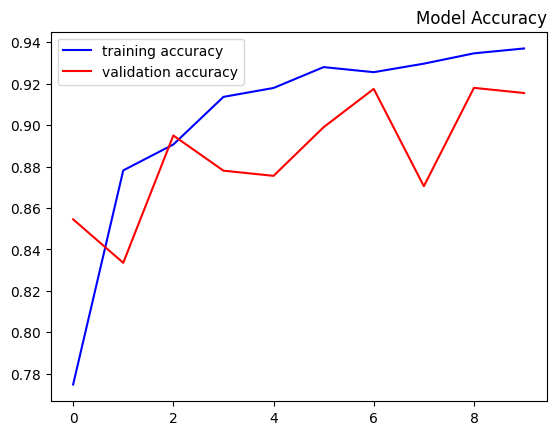

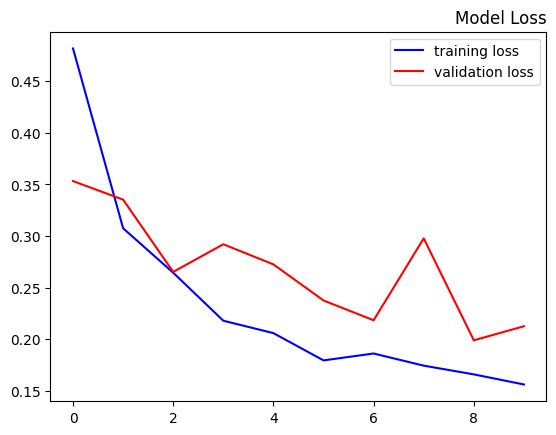

In [6]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(range(len(train_acc)), train_acc, c='b', label='training accuracy')
plt.plot(range(len(val_acc)), val_acc, c='r', label='validation accuracy')
plt.title('Model Accuracy', loc='right')
plt.legend()
plt.show()

plt.plot(range(len(train_loss)), train_loss, c='b', label='training loss')
plt.plot(range(len(val_loss)), val_loss, c='r', label='validation loss')
plt.title('Model Loss', loc='right')
plt.legend()
plt.show()


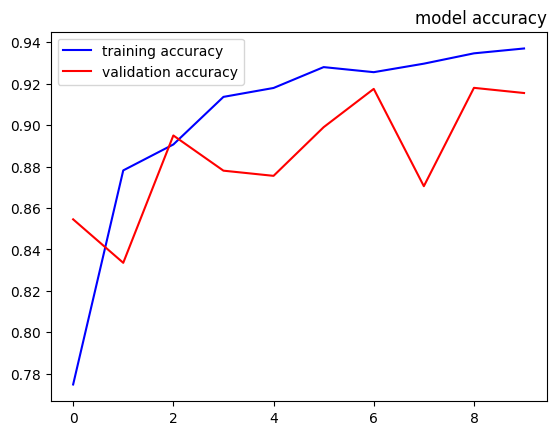

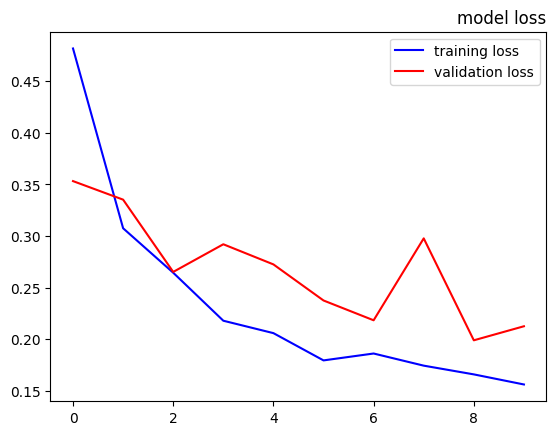

In [7]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
tarin_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(range (len (tarin_acc)),tarin_acc,c='b',label = 'training accuracy')
plt.plot (range (len (val_acc)),val_acc,c='r',label = 'validation accuracy')
plt.title ('model accuracy',loc ='right')
plt.legend()
plt.show()

plt.plot(range (len (train_loss)),train_loss,c='b',label = 'training loss')
plt.plot (range (len (val_loss)),val_loss,c='r',label = 'validation loss')
plt.title ('model loss',loc ='right')
plt.legend()
plt.show()

In [8]:
y_pred = model.predict (test_generator)
y_pred = y_pred.reshape (-1,)
y_pred = np.float16(y_pred>=0.5 )

125/125 ━━━━━━━━━━━━━━━━━━━━ 84s 646ms/step


Found 10224 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 1894 images belonging to 2 classes.


d:\mini project 1\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
d:\mini project 1\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 58s 171ms/step - accuracy: 0.5497 - loss: 0.6849 - val_accuracy: 0.7580 - val_loss: 0.5413
Epoch 2/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 50s 157ms/step - accuracy: 0.8673 - loss: 0.3204 - val_accuracy: 0.7630 - val_loss: 0.7132
Epoch 3/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 50s 155ms/step - accuracy: 0.9353 - loss: 0.1744 - val_accuracy: 0.8025 - val_loss: 0.6041
Epoch 4/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 49s 152ms/step - accuracy: 0.9769 - loss: 0.0718 - val_accuracy: 0.8030 - val_loss: 0.6499
Epoch 5/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 52s 163ms/step - accuracy: 0.9814 - loss: 0.0593 - val_accuracy: 0.7930 - val_loss: 0.7561
Epoch 6/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 51s 158ms/step - accuracy: 0.9869 - loss: 0.0376 - val_accuracy: 0.7850 - val_loss: 0.8263
Epoch 7/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 47s 147ms/step - accuracy: 0.9920 - loss: 0.0272 - val_accuracy: 0.7725 - val_loss: 0.8778
Epoch 8/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 48s 150ms/step - accuracy: 0.9897 - loss: 0

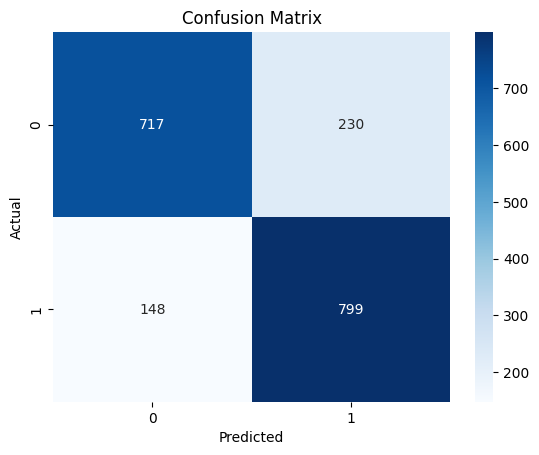

              precision    recall  f1-score   support

           0       0.83      0.76      0.79       947
           1       0.78      0.84      0.81       947

    accuracy                           0.80      1894
   macro avg       0.80      0.80      0.80      1894
weighted avg       0.80      0.80      0.80      1894



In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


train_dir = "D:\\mini project 1\\train"  
val_dir = "D:\\mini project 1\\val"      
test_dir = "D:\\mini project 1\\test"    

img_size = (64, 64)  
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1.0/255.0)
val_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical"
)

val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical"
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False  
)


model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(len(train_data.class_indices), activation="softmax")
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


model.fit(train_data, validation_data=val_data, epochs=10)

y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = test_data.classes

cm = confusion_matrix(y_test_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test_classes, y_pred_classes))


In [1]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import numpy as np
import cv2
import tensorflow as tf

model = tf.keras.models.load_model(r"D:\mini project 1\model.keras")

window = tk.Tk()
window.title("Deepfake Face Swap Detection")
window.geometry("600x500")
window.config(bg="#f0f0f0")

BUTTON_COLOR = "#6200EE"
BUTTON_TEXT_COLOR = "white"
LABEL_COLOR = "#333333"
RESULT_LABEL_COLOR = "#FF5722"
TEXT_BOX_COLOR = "#ffffff"
HEADER_COLOR = "#FF9800"
FONT_STYLE = ("Helvetica", 14)

def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (256, 256))
    img = img.astype(np.float32) / 255.0
    return np.expand_dims(img, axis=0)

def open_file_dialog():
    filename = filedialog.askopenfilename(title="Select Image", filetypes=[("Image files", "*.png;*.jpg;*.jpeg")])
    if filename:
        result_label.config(text="Analyzing...", fg="#4CAF50")
        display_img = Image.open(filename)
        display_img.thumbnail((300, 300))
        display_img = ImageTk.PhotoImage(display_img)
        image_label.config(image=display_img)
        image_label.image = display_img
        window.after(1000, analyze_image, filename)

def analyze_image(filename):
    img = preprocess_image(filename)
    prediction = model.predict(img)
    label = "Deepfake Detected" if prediction[0][0] >= 0.7 else "No Deepfake Detected"
    result_label.config(text=label, fg=RESULT_LABEL_COLOR)

instruction_label = tk.Label(window, text="Add the picture that you want to detect whether it is deepfaked or not. The image should be clear for better accuracy.", font=("Helvetica", 12, "italic"), bg="#f0f0f0", wraplength=550, justify="center", fg=LABEL_COLOR)
instruction_label.pack(pady=20)

def on_hover_button(event):
    browse_button.config(bg="#7C4DFF")

def on_leave_button(event):
    browse_button.config(bg=BUTTON_COLOR)

browse_button = tk.Button(window, text="Browse", command=open_file_dialog, font=FONT_STYLE, bg=BUTTON_COLOR, fg=BUTTON_TEXT_COLOR, relief="flat", padx=20, pady=10, bd=0, highlightthickness=0)
browse_button.pack(pady=30)
browse_button.bind("<Enter>", on_hover_button)
browse_button.bind("<Leave>", on_leave_button)

result_label = tk.Label(window, text="", font=("Helvetica", 16, "bold"), bg="#f0f0f0", fg="#4CAF50")
result_label.pack(pady=10)

image_label = tk.Label(window, bg="#f0f0f0")
image_label.pack(pady=20)

footer_label = tk.Label(window, text="Deepfake Detection Powered by AI ", font=("Helvetica", 10, "italic"), fg=HEADER_COLOR, bg="#f0f0f0")
footer_label.pack(side="bottom", pady=10)

window.mainloop()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
